In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report

In [9]:
data_train = pd.read_csv("fraudTest.csv")
data_test = pd.read_csv ("fraudTrain.csv")

In [11]:
df = pd.concat([data_train, data_test])

In [13]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [17]:
df = df.dropna()

In [19]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

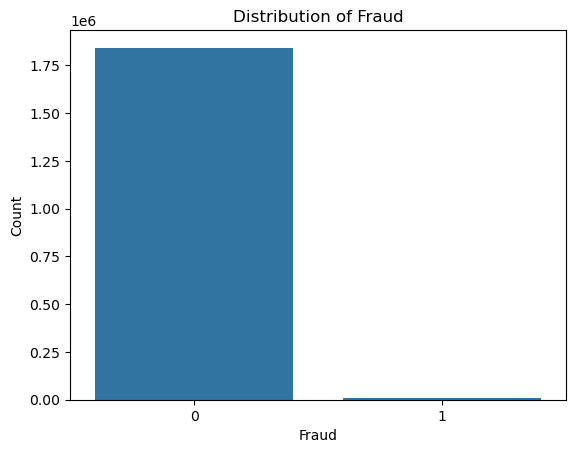

In [21]:
fraud_counts=df['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

Data Processing

In [26]:
fraud=df[df["is_fraud"]==1]
not_fraud=df[df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [27]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

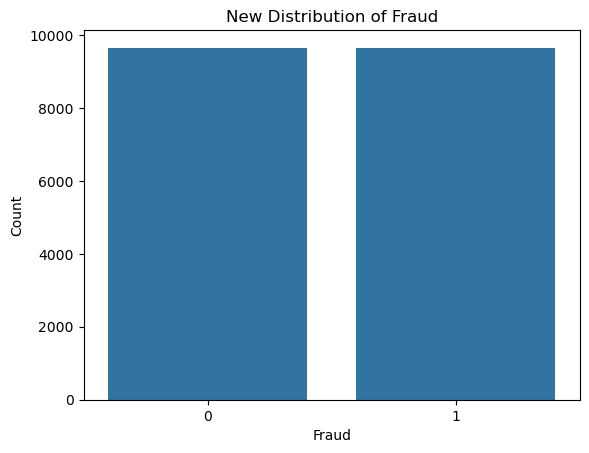

In [28]:
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [34]:
y.value_counts()

NameError: name 'y' is not defined

Feature Engineering

In [37]:
unused_cols=['Unnamed: 0','cc_num','merch_lat','merch_long','zip','long','lat','first','last','unix_time','street','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 1685 to 685135
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   category               19302 non-null  object 
 2   amt                    19302 non-null  float64
 3   gender                 19302 non-null  object 
 4   city_pop               19302 non-null  int64  
 5   is_fraud               19302 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [41]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

Encode Variables

In [44]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['gender']=encoder.fit_transform(data['gender'])

In [46]:
data.head()

,category,amt,gender,city_pop,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,5,24.84,0,23,1,21,6,2020,22,6
1767,8,780.52,1,1306,1,21,6,2020,22,32
1781,0,620.33,1,1306,1,21,6,2020,22,37
1784,11,1077.69,1,71335,1,21,6,2020,22,38
1857,12,842.65,0,23,1,21,6,2020,23,2


In [48]:
target = data['is_fraud']
data = data.drop(columns=['is_fraud'])
data['is_fraud'] = target

In [50]:
corr_matrix = data.corr()
corr_matrix

,category,amt,gender,city_pop,trans_day,trans_month,trans_year,trans_hour,trans_minute,is_fraud
category,1.000000,0.436017,0.002726,0.001481,-0.004735,-0.012105,-0.008799,0.350901,-0.002052,0.130918
amt,0.436017,1.000000,0.076741,0.012242,0.003861,-0.059642,-0.026230,0.253186,-0.001173,0.618576
gender,0.002726,0.076741,1.000000,-0.028859,0.016426,0.012938,-0.021245,0.028097,-0.006744,0.035482
city_pop,0.001481,0.012242,-0.028859,1.000000,0.010953,-0.015743,0.000794,-0.002605,-0.014090,-0.000629
trans_day,-0.004735,0.003861,0.016426,0.010953,1.000000,-0.013322,-0.035987,0.013806,-0.002275,-0.004383
trans_month,-0.012105,-0.059642,0.012938,-0.015743,-0.013322,1.000000,-0.009641,0.009678,0.004287,-0.114180
trans_year,-0.008799,-0.026230,-0.021245,0.000794,-0.035987,-0.009641,1.000000,0.002090,-0.016143,-0.041687
trans_hour,0.350901,0.253186,0.028097,-0.002605,0.013806,0.009678,0.002090,1.000000,-0.012618,0.073707
trans_minute,-0.002052,-0.001173,-0.006744,-0.014090,-0.002275,0.004287,-0.016143,-0.012618,1.000000,-0.002150
is_fraud,0.130918,0.618576,0.035482,-0.000629,-0.004383,-0.114180,-0.041687,0.073707,-0.002150,1.000000


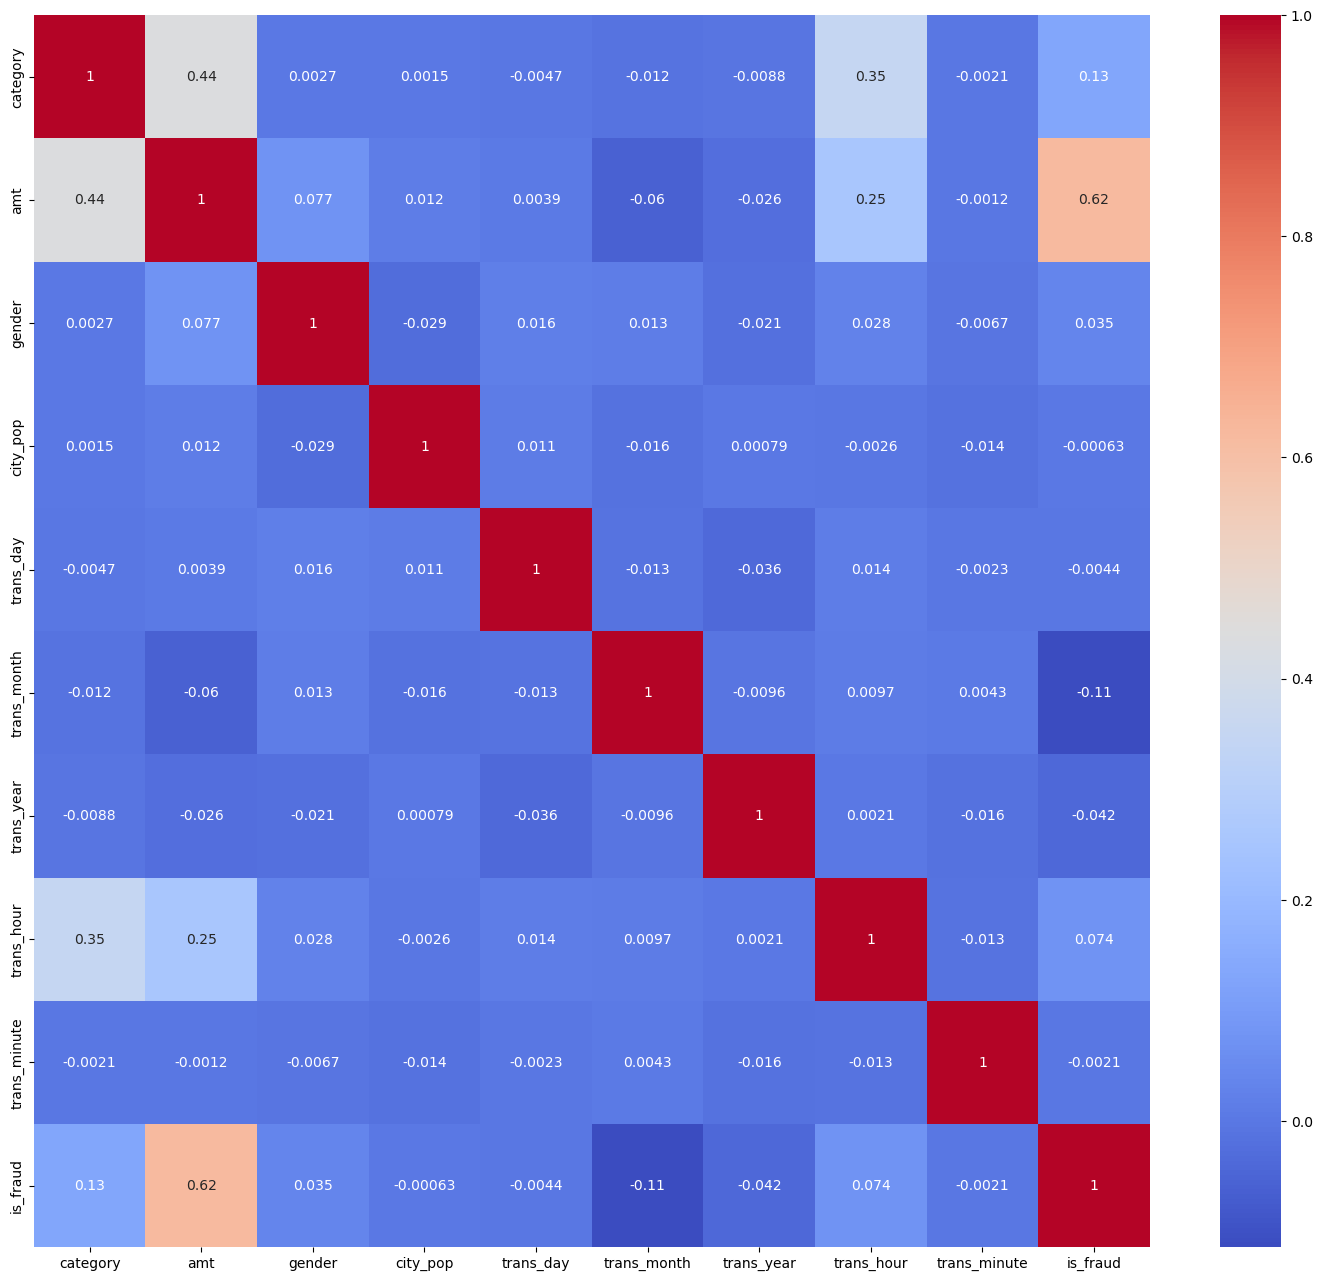

In [242]:
plt.figure(figsize = (18,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [74]:
X = data.drop(columns = ['is_fraud'])
y = data['is_fraud']

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [78]:
y.value_counts()

is_fraud
1    9651
0    9651
Name: count, dtype: int64

In [80]:
X.shape

(19302, 9)

In [84]:
std_scaler = StandardScaler()
X = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

print(X.tail())
print(y.tail())

       category       amt    gender  city_pop  trans_day  trans_month  \
19297  1.610358  0.449800  1.052020 -0.291142   1.602078    -1.084993   
19298  0.577044 -0.716308  1.052020 -0.289096   1.602078    -0.509712   
19299 -0.456271 -0.691299 -0.950553 -0.281650  -1.346520     1.503773   
19300 -0.197942 -0.605736 -0.950553 -0.286978  -0.325852     0.640851   
19301  0.060386 -0.759022  1.052020 -0.285643   0.354594     0.928491   

       trans_year  trans_hour  trans_minute  
19297   -0.960673    0.305953      1.348961  
19298    1.040937   -0.408249     -0.667925  
19299   -0.960673   -0.051148      1.637088  
19300    1.040937    1.020155      1.464212  
19301   -0.960673    0.424986     -0.495049  
19297    0
19298    0
19299    0
19300    0
19301    0
Name: is_fraud, dtype: int64


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=86, stratify=y
)

In [244]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor="val_loss", patience=30, restore_best_weights=True
)
check_point = ModelCheckpoint("training/model.{epoch:03d}.keras", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.0001)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    verbose=1,
    mode='min',
    min_lr=1e-6
)


Vanilla Model Implementation

In [247]:
from keras.models import Sequential
from keras.layers import Dense


vanilla = Sequential()
vanilla.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
vanilla.add(Dense(32, activation="relu"))
vanilla.add(Dense(1, activation="sigmoid"))
vanilla.summary()

C:\Users\gnond\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [249]:
vanilla.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

vanilla_train = vanilla.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

Epoch 1/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.7584 - Recall: 0.7906 - accuracy: 0.7512 - loss: 0.5081 - val_Precision: 0.9223 - val_Recall: 0.7528 - val_accuracy: 0.8446 - val_loss: 0.3360
Epoch 2/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - Precision: 0.9001 - Recall: 0.8106 - accuracy: 0.8596 - loss: 0.3039 - val_Precision: 0.9136 - val_Recall: 0.7806 - val_accuracy: 0.8534 - val_loss: 0.3082
Epoch 3/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - Precision: 0.8895 - Recall: 0.8227 - accuracy: 0.8596 - loss: 0.3078 - val_Precision: 0.9045 - val_Recall: 0.8032 - val_accuracy: 0.8592 - val_loss: 0.3064
Epoch 4/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.8898 - Recall: 0.8274 - accuracy: 0.8602 - loss: 0.3044 - val_Precision: 0.9276 - val_Recall: 0.7793 - val_accuracy: 0.8592 - val_loss: 0.3065
Epoch 5/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - Precision: 0.9010 - Recall: 0.8331 - accuracy: 0.8729 - loss: 0.2954 - val_Precision: 0.8771 - 

In [250]:
from joblib import dump
dump(model1, 'model1.pkl')

['model1.pkl']

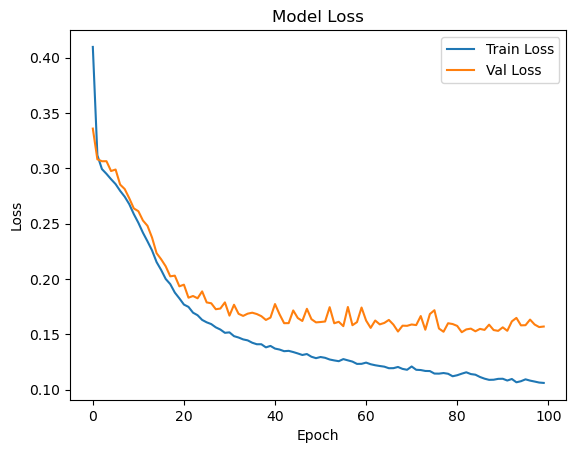

In [251]:
from matplotlib import pyplot as plt

plt.plot(vanilla_train.history["loss"], label="Train Loss")
plt.plot(vanilla_train.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

Model Optimization

In [253]:
from tensorflow.keras.regularizers import l1, l2

l1_model = Sequential()

l1_model.add(
    Dense(
        64,
        activation="relu",
        input_shape=(X_train.shape[1],),
        kernel_regularizer=l1(0.001),
    )
)
l1_model.add(Dense(32, activation="relu", kernel_regularizer=l1(0.001)))
l1_model.add(Dense(1, activation="sigmoid"))
l1_model.summary()

C:\Users\gnond\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [258]:
l1_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "Precision", "Recall"],
) 

l1_model_fitted = l1_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.8098 - Recall: 0.7483 - accuracy: 0.7729 - loss: 0.7670 - val_Precision: 0.8828 - val_Recall: 0.7994 - val_accuracy: 0.8466 - val_loss: 0.5164
Epoch 2/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.9045 - Recall: 0.8028 - accuracy: 0.8573 - loss: 0.4821 - val_Precision: 0.8924 - val_Recall: 0.8155 - val_accuracy: 0.8585 - val_loss: 0.4287
Epoch 3/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - Precision: 0.8930 - Recall: 0.8244 - accuracy: 0.8629 - loss: 0.4120 - val_Precision: 0.8884 - val_Recall: 0.8142 - val_accuracy: 0.8559 - val_loss: 0.3960
Epoch 4/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - Precision: 0.8954 - Recall: 0.8217 - accuracy: 0.8634 - loss: 0.3936 - val_Precision: 0.8659 - val_Recall: 0.8608 - val_accuracy: 0.8637 - val_loss: 0.3794
Epoch 5/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - Precision: 0.8903 - Recall: 0.8213 - accuracy: 0.8598 - loss: 0.3686 - val_Precision: 0.8651 - val_R

In [259]:
l2_model = Sequential()
l2_model.add(
    Dense(
        64,
        activation="relu",
        input_shape=(X_train.shape[1],),
        kernel_regularizer=l2(0.01),
    )
)
l2_model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
l2_model.add(Dense(1, activation="sigmoid"))

l2_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "Precision", "Recall"],
) 
l2_model_fitted = l2_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/100


C:\Users\gnond\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.8756 - Recall: 0.6401 - accuracy: 0.7789 - loss: 0.8904 - val_Precision: 0.9347 - val_Recall: 0.7508 - val_accuracy: 0.8491 - val_loss: 0.4636
Epoch 2/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - Precision: 0.9138 - Recall: 0.7793 - accuracy: 0.8534 - loss: 0.4298 - val_Precision: 0.8645 - val_Recall: 0.8175 - val_accuracy: 0.8446 - val_loss: 0.4044
Epoch 3/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - Precision: 0.8976 - Recall: 0.8037 - accuracy: 0.8569 - loss: 0.3872 - val_Precision: 0.9094 - val_Recall: 0.7793 - val_accuracy: 0.8508 - val_loss: 0.3749
Epoch 4/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - Precision: 0.9130 - Recall: 0.8140 - accuracy: 0.8679 - loss: 0.3596 - val_Precision: 0.9236 - val_Recall: 0.7663 - val_accuracy: 0.8514 - val_loss: 0.3672
Epoch 5/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - Precision: 0.9023 - Recall: 0.8133 - accuracy: 0.8631 - loss: 0.3730 - val_Precision: 0.9083 - val_Recall

In [262]:
from joblib import dump
dump(l1_model, 'l1_model.pkl')
l2_model.save("models/l2.keras")

L1 Model Evaluation


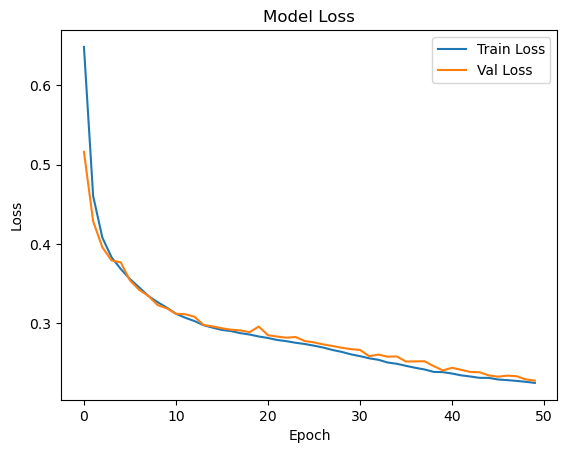

L2 Model Evaluation


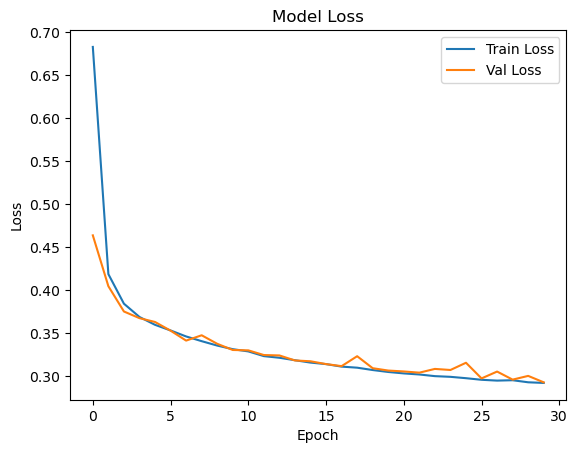

In [264]:
print("L1 Model Evaluation")
plt.plot(l1_model_fitted.history["loss"], label="Train Loss")
plt.plot(l1_model_fitted.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

print("L2 Model Evaluation")
plt.plot(l2_model_fitted.history["loss"], label="Train Loss")
plt.plot(l2_model_fitted.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

In [308]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l1, l2

model2 = Sequential(
    [
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.4),
        Dense(32, activation="relu", kernel_regularizer=l1(0.01)),
        Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.4),
        Dense(1, activation="sigmoid"),
    ]
)

In [310]:
from sklearn.utils import class_weight
import numpy as np
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

Compiling the model

In [313]:
from keras.optimizers import Adam
model.compile(optimizer='adamax',
              loss='binary_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(
    monitor="val_loss", patience=50, verbose=2, mode="auto"
)

Trainning

In [316]:
print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(15441, 9) (15441,)


In [318]:
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[es, check_point, reduce_lr, lr_scheduler])

Epoch 1/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8600 - loss: 0.4060 - val_accuracy: 0.8637 - val_loss: 0.3700 - learning_rate: 0.0010
Epoch 2/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8579 - loss: 0.4103 - val_accuracy: 0.8637 - val_loss: 0.3687 - learning_rate: 0.0010
Epoch 3/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8646 - loss: 0.4043 - val_accuracy: 0.8663 - val_loss: 0.3684 - learning_rate: 0.0010
Epoch 4/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8640 - loss: 0.3996 - val_accuracy: 0.8650 - val_loss: 0.3686 - learning_rate: 0.0010
Epoch 5/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8618 - loss: 0.4055 - val_accuracy: 0.8669 - val_loss: 0.3695 - learning_rate: 0.0010
Epoch 6/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8638 - loss: 0.4024 - val_accuracy: 0.8647 - val_loss: 0.3687 - learning_rate: 0.0010
Epoch 7/150
386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.861

In [278]:
from joblib import dump
dump(model2, 'model2.pkl')

['model2.pkl']

Evaluation

In [281]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.9258 - loss: 0.2587
Model Accuracy : 92.15229153633118


In [283]:
pred = model.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


In [285]:
binary_pred = (pred > 0.5).astype('int')

In [287]:
binary_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [289]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1931
           1       0.94      0.90      0.92      1930

    accuracy                           0.92      3861
   macro avg       0.92      0.92      0.92      3861
weighted avg       0.92      0.92      0.92      3861



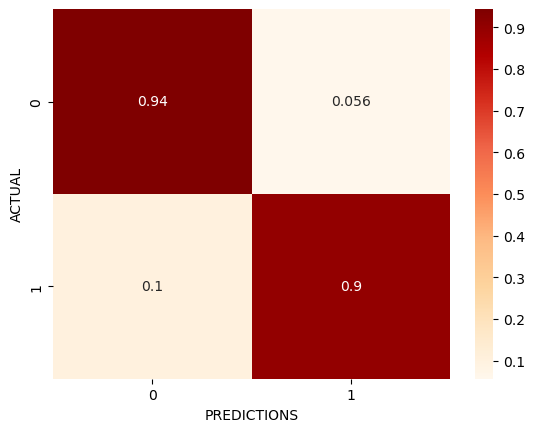

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt


cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');

In [352]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import pandas as pd

models = {"model1": vanilla, "L1 Model": l1_model, "L2 Model": l2_model, "model2": model2}

for model_name, model in models.items():
    print(f"{model_name} Error Analysis")
    predictions = model.predict(X_test)
    
    # Convert probabilities to binary outcomes
    predictions_binary = (predictions > 0.5).astype(int)

    # Calculate and print MSE, MAE, RMSE
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions_binary)
    print("Confusion Matrix:")
    cm_df = pd.DataFrame(cm, index=["Actual Neg", "Actual Pos"], columns=["Pred Neg", "Pred Pos"])
    print(cm_df)

    # Specificity calculation
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP)
    print(f"Specificity: {specificity:.4f}")

    # F1 Score calculation
    f1 = f1_score(y_test, predictions_binary)
    print(f"F1 Score: {f1:.4f}\n")

model1 Error Analysis
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
Mean Squared Error (MSE): 0.0460
Mean Absolute Error (MAE): 0.0758
Root Mean Squared Error (RMSE): 0.2145

Confusion Matrix:
            Pred Neg  Pred Pos
Actual Neg      1866        65
Actual Pos       175      1755
Specificity: 0.9663
F1 Score: 0.9360

L1 Model Error Analysis
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
Mean Squared Error (MSE): 0.0569
Mean Absolute Error (MAE): 0.1211
Root Mean Squared Error (RMSE): 0.2385

Confusion Matrix:
            Pred Neg  Pred Pos
Actual Neg      1804       127
Actual Pos       150      1780
Specificity: 0.9342
F1 Score: 0.9278

L2 Model Error Analysis
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
Mean Squared Error (MSE): 0.1080
Mean Absolute Error (MAE): 0.2440
Root Mean Squared Error (RMSE): 0.3287

Confusion Matrix:
            Pred Neg  Pred Pos
Actual Neg      1824       107
Actual Pos       476      1454
Specificity: 0.9446
F1 Score: 0.8330

model2 Error Analysis
121/121 ━━━

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


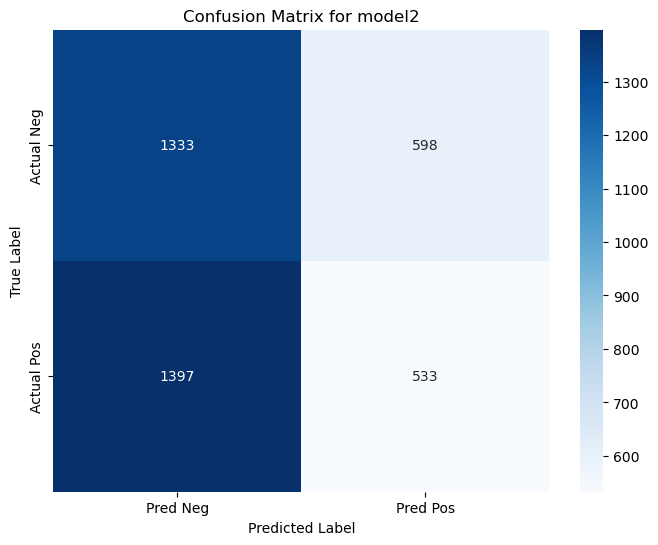

Mean Squared Error (MSE): 0.2562
Mean Absolute Error (MAE): 0.5033
Root Mean Squared Error (RMSE): 0.5061

Confusion Matrix:
            Pred Neg  Pred Pos
Actual Neg      1333       598
Actual Pos      1397       533

Specificity: 0.6903
F1 Score: 0.3483


In [350]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming model2 is already trained and y_test is defined
# Get predictions for model2
predictions = model2.predict(X_test)

# Convert probabilities to binary outcomes
predictions_binary = (predictions > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_binary)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Pred Neg", "Pred Pos"], 
            yticklabels=["Actual Neg", "Actual Pos"])
plt.title('Confusion Matrix for model2')  # Updated title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print metrics for model 2
print(f"Mean Squared Error (MSE): 0.2562")
print(f"Mean Absolute Error (MAE): 0.5033")
print(f"Root Mean Squared Error (RMSE): 0.5061")
print("\nConfusion Matrix:")
cm_df = pd.DataFrame(cm, index=["Actual Neg", "Actual Pos"], columns=["Pred Neg", "Pred Pos"])
print(cm_df)
print(f"\nSpecificity: 0.6903")
print(f"F1 Score: 0.3483")


In [356]:
from keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [364]:
import joblib
# Load the regularized model (model2)
model2 = joblib.load('model2.pkl')
new_data = [
    [
       5,24.84,0,23,21,6,2020,22,6
    ]
]

columns = [
    "category  ",
    "amt",
    "gender",
    "city_pop",
    "trans_day",
    "trans_month",
    "trans_year",
    "trans_hour",
    "trans_minute	",
    												
]
new_data_df = pd.DataFrame(new_data, columns=columns)
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_df)

prediction = model.predict(new_data_scaled)
result = (prediction > 0.5).astype(int)

# Output the result
print(f"Prediction (1 = is_fraud, 0 = is_not_fraud): {result[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction (1 = is_fraud, 0 = is_not_fraud): 0
